In [22]:
import scvelo as scv
import pandas
%matplotlib inline

In [23]:
filename = '/beegfs/scratch/ric.cosr/ric.bonanomi/counts_Tomato_ref_BonanomiD_1287_scRNA_injury/1_TdTomato/velocyto/1_TdTomato.loom'
udata = scv.read(filename, cache=True)
udata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [24]:
udf = pandas.read_csv('/beegfs/scratch/ric.cosr/ric.bonanomi/counts_Tomato_ref_BonanomiD_1287_scRNA_injury/scvelo_newidents/uninj_cell_new_idents.csv')
for i in udf.index:
    udf['Unnamed: 0'][i] = udf['Unnamed: 0'][i].rstrip('-1_2')
udf

,Unnamed: 0,V1
0,AAACCCAGTGGTCAAG,BARR_END_CAP
1,AAAGAACAGCTGGCTC,ARTERIAL
2,AAAGGATAGTGGATAT,CAPILLARY_PLVAP-
3,AAAGGATGTCCCGCAA,VENOUS_PLVAP+
4,AAAGGATGTCTTGAAC,TIP_1
...,...,...
861,TTTCGATTCATTTGGG,ARTERIAL
862,TTTGACTCATAGAAAC,TIP_1
863,TTTGGAGCACGGTAGA,CAPILLARY_PLVAP-
864,TTTGGAGCATCCAATG,CAPILLARY_PLVAP-


In [25]:
udf['V1'].value_counts()

VENOUS_PLVAP+       266
BARR_END_CAP        181
CAPILLARY_PLVAP-    129
ARTERIAL             93
TIP_1                52
VENOUS_PLVAP-        44
CAPILLARY_PLVAP+     42
TIP_2                38
TIP_3                21
Name: V1, dtype: int64

In [26]:
udata.obs['seurat'] = 'filtered'
udata.obs['cell_name'] = 'tobeassigned'
for i in range(len(udata.obs.index)):
    udata.obs['cell_name'][i] = udata.obs.index[i].replace('1_TdTomato:','').replace('x','')
udata.obs

,Clusters,_X,_Y,seurat,cell_name
1_TdTomato:AAGCGTTAGCAGTAATx,1,-11.055329,-20.377151,filtered,AAGCGTTAGCAGTAAT
1_TdTomato:AAACGCTTCATGCGGCx,6,-6.222165,33.400272,filtered,AAACGCTTCATGCGGC
1_TdTomato:AAGTGAAAGTATTAGGx,1,-9.735782,-22.310652,filtered,AAGTGAAAGTATTAGG
1_TdTomato:ACACAGTCAGGTAGTGx,2,-14.471598,-0.320278,filtered,ACACAGTCAGGTAGTG
1_TdTomato:AAGACTCCACTACCCTx,2,24.683651,-9.078682,filtered,AAGACTCCACTACCCT
...,...,...,...,...,...
1_TdTomato:TTTGGAGCACGGTAGAx,0,-2.041518,11.029997,filtered,TTTGGAGCACGGTAGA
1_TdTomato:TTTAGTCCACGACCTGx,3,25.209841,12.250366,filtered,TTTAGTCCACGACCTG
1_TdTomato:TTTCAGTGTATTGGCTx,2,-17.808777,-1.169763,filtered,TTTCAGTGTATTGGCT
1_TdTomato:TTTACTGTCGTGCTCTx,2,-17.557983,-4.151796,filtered,TTTACTGTCGTGCTCT


In [27]:
for j in range(len(udata.obs['cell_name'])):
    for i in range(len(udf['Unnamed: 0'])):
        if udf['Unnamed: 0'][i] == udata.obs['cell_name'][j]:
            udata.obs['seurat'][j] = udf['V1'][i]
            break
udata.obs

,Clusters,_X,_Y,seurat,cell_name
1_TdTomato:AAGCGTTAGCAGTAATx,1,-11.055329,-20.377151,filtered,AAGCGTTAGCAGTAAT
1_TdTomato:AAACGCTTCATGCGGCx,6,-6.222165,33.400272,filtered,AAACGCTTCATGCGGC
1_TdTomato:AAGTGAAAGTATTAGGx,1,-9.735782,-22.310652,BARR_END_CAP,AAGTGAAAGTATTAGG
1_TdTomato:ACACAGTCAGGTAGTGx,2,-14.471598,-0.320278,ARTERIAL,ACACAGTCAGGTAGTG
1_TdTomato:AAGACTCCACTACCCTx,2,24.683651,-9.078682,filtered,AAGACTCCACTACCCT
...,...,...,...,...,...
1_TdTomato:TTTGGAGCACGGTAGAx,0,-2.041518,11.029997,CAPILLARY_PLVAP-,TTTGGAGCACGGTAGA
1_TdTomato:TTTAGTCCACGACCTGx,3,25.209841,12.250366,TIP_1,TTTAGTCCACGACCTG
1_TdTomato:TTTCAGTGTATTGGCTx,2,-17.808777,-1.169763,BARR_END_CAP,TTTCAGTGTATTGGCT
1_TdTomato:TTTACTGTCGTGCTCTx,2,-17.557983,-4.151796,VENOUS_PLVAP+,TTTACTGTCGTGCTCT


In [28]:
udata.obs['seurat'].value_counts()

filtered            752
VENOUS_PLVAP+       266
BARR_END_CAP        181
CAPILLARY_PLVAP-    129
ARTERIAL             93
TIP_1                52
VENOUS_PLVAP-        44
CAPILLARY_PLVAP+     42
TIP_2                38
TIP_3                21
Name: seurat, dtype: int64

In [29]:
udata_filt = udata[udata.obs['seurat'] != 'filtered',:]

In [30]:
udata_filt.obs

,Clusters,_X,_Y,seurat,cell_name
1_TdTomato:AAGTGAAAGTATTAGGx,1,-9.735782,-22.310652,BARR_END_CAP,AAGTGAAAGTATTAGG
1_TdTomato:ACACAGTCAGGTAGTGx,2,-14.471598,-0.320278,ARTERIAL,ACACAGTCAGGTAGTG
1_TdTomato:AATTTCCAGCTAGCCCx,2,-18.580297,-7.787381,VENOUS_PLVAP+,AATTTCCAGCTAGCCC
1_TdTomato:AAGGTAAAGCGTGAACx,2,4.350145,3.961300,VENOUS_PLVAP+,AAGGTAAAGCGTGAAC
1_TdTomato:AACCATGCACCCTGTTx,1,-4.079106,-20.714483,VENOUS_PLVAP+,AACCATGCACCCTGTT
...,...,...,...,...,...
1_TdTomato:TTTGGAGCACGGTAGAx,0,-2.041518,11.029997,CAPILLARY_PLVAP-,TTTGGAGCACGGTAGA
1_TdTomato:TTTAGTCCACGACCTGx,3,25.209841,12.250366,TIP_1,TTTAGTCCACGACCTG
1_TdTomato:TTTCAGTGTATTGGCTx,2,-17.808777,-1.169763,BARR_END_CAP,TTTCAGTGTATTGGCT
1_TdTomato:TTTACTGTCGTGCTCTx,2,-17.557983,-4.151796,VENOUS_PLVAP+,TTTACTGTCGTGCTCT


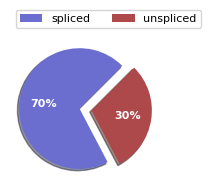

In [31]:
scv.pl.proportions(udata)

In [32]:
scv.pp.filter_and_normalize(udata_filt, n_top_genes=4000)
scv.pp.moments(udata_filt, n_pcs=30, n_neighbors=30)

Trying to set attribute `.obs` of view, copying.


Normalized count data: X, spliced, unspliced.
Extracted 4000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [33]:
udata_filt.obs

,Clusters,_X,_Y,seurat,cell_name,initial_size_spliced,initial_size_unspliced,initial_size,n_counts
1_TdTomato:AAGTGAAAGTATTAGGx,1,-9.735782,-22.310652,BARR_END_CAP,AAGTGAAAGTATTAGG,796,747,796.0,2693.000000
1_TdTomato:ACACAGTCAGGTAGTGx,2,-14.471598,-0.320278,ARTERIAL,ACACAGTCAGGTAGTG,1077,366,1077.0,2693.000000
1_TdTomato:AATTTCCAGCTAGCCCx,2,-18.580297,-7.787381,VENOUS_PLVAP+,AATTTCCAGCTAGCCC,3049,4386,3049.0,2693.000244
1_TdTomato:AAGGTAAAGCGTGAACx,2,4.350145,3.961300,VENOUS_PLVAP+,AAGGTAAAGCGTGAAC,1502,766,1502.0,2693.000000
1_TdTomato:AACCATGCACCCTGTTx,1,-4.079106,-20.714483,VENOUS_PLVAP+,AACCATGCACCCTGTT,3213,790,3213.0,2693.000000
...,...,...,...,...,...,...,...,...,...
1_TdTomato:TTTGGAGCACGGTAGAx,0,-2.041518,11.029997,CAPILLARY_PLVAP-,TTTGGAGCACGGTAGA,3193,1143,3193.0,2693.000244
1_TdTomato:TTTAGTCCACGACCTGx,3,25.209841,12.250366,TIP_1,TTTAGTCCACGACCTG,450,326,450.0,2693.000000
1_TdTomato:TTTCAGTGTATTGGCTx,2,-17.808777,-1.169763,BARR_END_CAP,TTTCAGTGTATTGGCT,1136,922,1136.0,2693.000000
1_TdTomato:TTTACTGTCGTGCTCTx,2,-17.557983,-4.151796,VENOUS_PLVAP+,TTTACTGTCGTGCTCT,10342,6527,10342.0,2693.000000


In [34]:
scv.tl.velocity(udata_filt)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [35]:
scv.tl.velocity_graph(udata_filt)

computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [36]:
scv.tl.umap(udata_filt)

saving figure to file ./figures/scvelo_uninj_umap.pdf


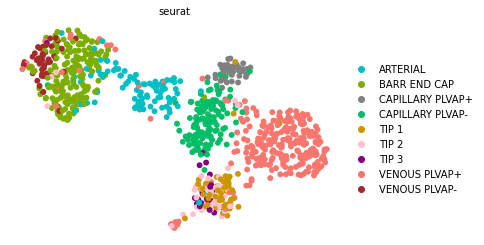

In [37]:
# palette = ['#00BFC4','#7CAE00','grey','#00BE67','#C77CFF','#FF61CC','black','#00A9FF','#CD9600','pink','#F8766D','brown']
palette = ['#00BFC4','#7CAE00','grey','#00BE67','#CD9600','pink','purple','#F8766D','brown']
scv.pl.umap(udata_filt, color=['seurat'], palette = palette, legend_loc='right_margin', save='uninj_umap.pdf')

saving figure to file ./figures/scvelo_uninj_umap_velo.svg


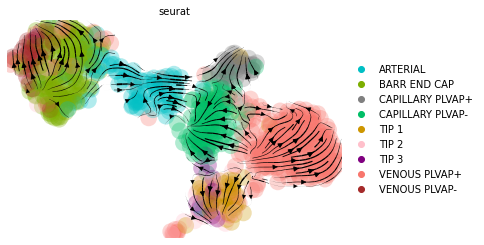

In [42]:
scv.pl.velocity_embedding_stream(udata_filt, basis='umap', color=['seurat'], palette = palette, 
                                 save='uninj_umap_velo.svg', #dpi=400, figsize=[10,7],
                                 legend_loc='right_margin')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
saving figure to file ./figures/scvelo_uninj_umap_velo_length.pdf


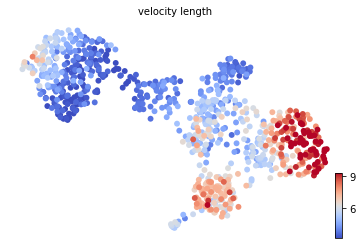

In [41]:
scv.tl.velocity_confidence(udata_filt)
scv.pl.scatter(udata_filt, c='velocity_length', cmap='coolwarm', perc=[5, 95], save='uninj_umap_velo_length.pdf')

saving figure to file ./figures/scvelo_uninj_umap_velo_conf.pdf


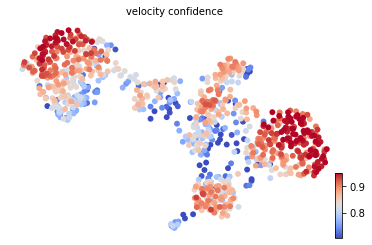

In [42]:
scv.pl.scatter(udata_filt, c='velocity_confidence', cmap='coolwarm', perc=[5, 95], save='uninj_umap_velo_conf.pdf')

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


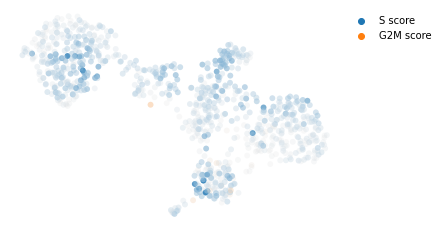

In [43]:
scv.tl.score_genes_cell_cycle(udata_filt)
scv.pl.scatter(udata_filt, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [27]:
udata_filt_seurat = udata_filt.copy()

In [28]:
ucoord = scv.load('uninj_cell_umap.csv')
ucoord.index = [ x.rstrip('-1_2') for x in ucoord.index ]
ucoord = ucoord.reindex(index=udata_filt_seurat.obs['cell_name'].values)
ucoord = ucoord.to_numpy()

In [29]:
udata_filt_seurat.obsm['X_umap'] = ucoord
udata_filt_seurat.obsm['X_umap']

array([[ 4.06507308,  0.49019901],
       [ 3.83603651, -3.18765565],
       [-0.43249135,  2.75164536],
       ...,
       [ 3.80939741,  1.03761546],
       [-0.37668972,  3.19966868],
       [ 4.68996842, -2.76834997]])

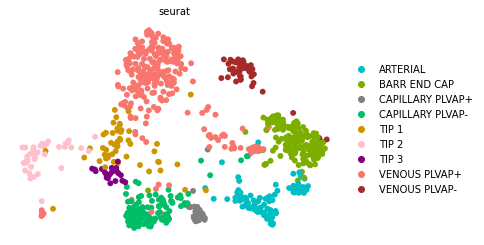

In [44]:
scv.pl.umap(udata_filt_seurat, color=['seurat'], palette = palette, legend_loc='right_margin')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_uninj_seuratumap_velo.png


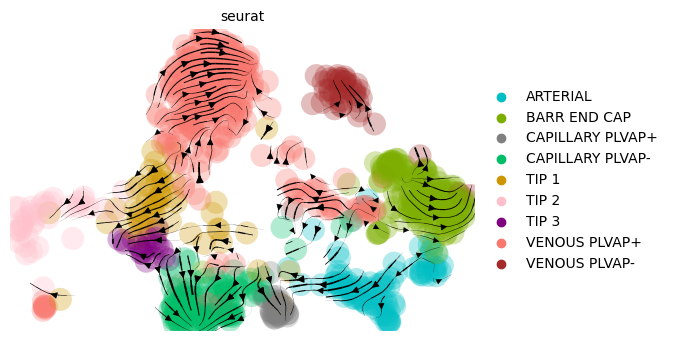

In [45]:
scv.tl.velocity(udata_filt_seurat)
scv.tl.velocity_graph(udata_filt_seurat)
scv.pl.velocity_embedding_stream(udata_filt_seurat, basis='umap', color=['seurat'], palette = palette, 
                                 legend_loc='right_margin', save='uninj_seuratumap_velo.pdf', dpi=100)

In [16]:
help(scv.pl.velocity_embedding_stream)

Help on function velocity_embedding_stream in module scvelo.plotting.velocity_embedding_stream:

velocity_embedding_stream(adata, basis=None, vkey='velocity', density=None, smooth=None, min_mass=None, cutoff_perc=None, arrow_color=None, linewidth=None, n_neighbors=None, recompute=None, color=None, use_raw=None, layer=None, color_map=None, colorbar=True, palette=None, size=None, alpha=0.3, perc=None, X=None, V=None, X_grid=None, V_grid=None, sort_order=True, groups=None, components=None, legend_loc='on data', legend_fontsize=None, legend_fontweight=None, xlabel=None, ylabel=None, title=None, fontsize=None, figsize=None, dpi=None, frameon=None, show=None, save=None, ax=None, ncols=None, **kwargs)
    Stream plot of velocities on the embedding.
    
    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    density: `float` (default: 1)
        Amount of velocities to show - 0 none to 1 all
    smooth: `float` (default: 0.5)
        Multiplication 